<a href="https://colab.research.google.com/github/FirojB/Rental_Usage_Prediction/blob/main/Rental_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# ***Importing the Library and Google Drive Mounting***
---


In [1]:

# @title Mounting the Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#@title Import Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Importing Done !!!")

Importing Done !!!


In [3]:
#@title Data Importing 
bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3. Predict Bike Rental Usage/bike_sharing_daily.csv")

In [4]:
bike.head(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [5]:
bike.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
721,722,12/22/2012,1,1,12,0,6,0,1,0.265833,0.441250,0.407346,205,1544,1749
722,723,12/23/2012,1,1,12,0,0,0,1,0.245833,0.515417,0.133083,408,1379,1787
723,724,12/24/2012,1,1,12,0,1,1,2,0.231304,0.791304,0.077230,174,746,920
724,725,12/25/2012,1,1,12,1,2,0,2,0.291304,0.734783,0.168726,440,573,1013
725,726,12/26/2012,1,1,12,0,3,1,3,0.243333,0.823333,0.316546,9,432,441
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,439,2290,2729


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [7]:
#@title Data Summary 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# ***Data Handling***
---




<Axes: >

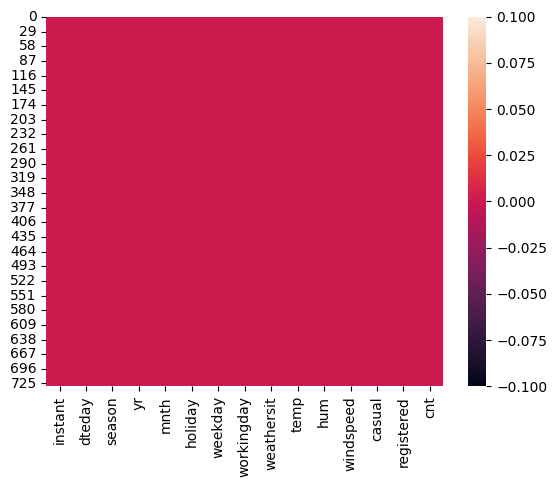

In [8]:
#@title Dataset Cleaning
sns.heatmap(bike.isnull())  # to check for any missing Data

In [9]:
# Removing the  "instant" Coloumn
bike = bike.drop(labels = "instant",axis = 1) 
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [10]:
# Removinf more than one columns 
bike = bike.drop(labels = ["casual", "registered"], axis = 1) 
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [11]:
# Transform by Overwriting a specific Column to apply time series calculation
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y') 
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [12]:
# Setting the First column as an index and deleting the dteday
bike.index = pd.DatetimeIndex(bike.dteday)
bike = bike.drop(labels = ['dteday'], axis = 1)
bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


# ***Data Visualization***

---

Text(0, 0.5, 'Bike rentals')

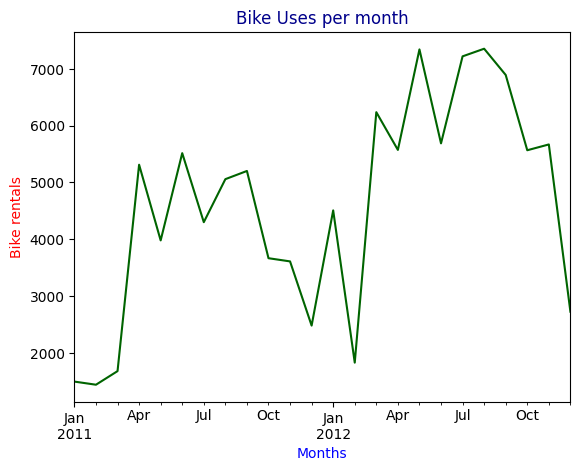

In [13]:
#@title Frequency of Occurrence for weekly 'W', for Monthly 'M'

bike['cnt'].asfreq('M').plot(linewidth = 1.5, color = 'darkgreen')
plt.title('Bike Uses per month', color = 'darkblue')
plt.xlabel('Months', color = 'blue')
plt.ylabel('Bike rentals' , color = 'red')

Text(0, 0.5, 'Bike Rental')

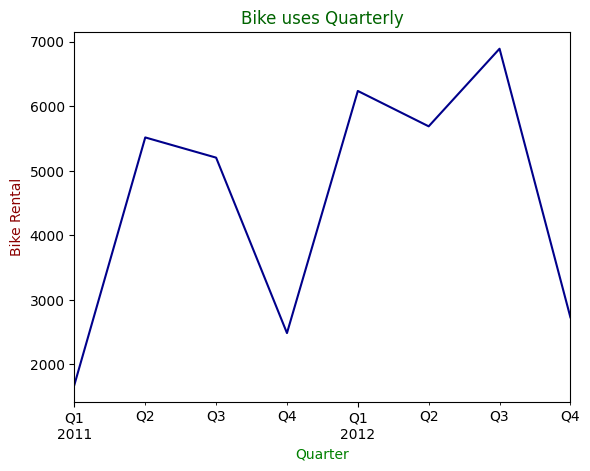

In [14]:
#@title Frequency of Occurrence Quarterly
bike['cnt'].asfreq('Q').plot(linewidth = 1.5, color = 'darkblue' )
plt.title('Bike uses Quarterly', color = 'darkgreen')
plt.xlabel('Quarter', color = 'green')
plt.ylabel('Bike Rental', color = 'darkred')

In [ ]:
#@title Visualising the entire data using Seaborn 

sns.pairplot(bike) # print every single column

In [ ]:
# Get only numerical data
X_numerical = bike[['temp','hum','windspeed','cnt']]
print(X_numerical.head(5))

In [ ]:
sns.pairplot(X_numerical)

In [ ]:
#@title  Visualising teh Correlation between the numerical values, 
# -ve meas less correlation, +ve is more correalation
sns.heatmap(X_numerical.corr(), annot = True)

# ***Create Training and Test Dataset***

In [ ]:
#@title Takes all the categories in the Dataset
X_cat = bike[['season',	'yr' , 'mnth',	'holiday',	'weekday', 'workingday' ,	'weathersit']]

# prints all the catogorical data
X_cat.head(10)

In [ ]:
#@title Encoding the data into 1 & 0s

from sklearn.preprocessing import OneHotEncoder #OnHoEncoder is use to encode the  all categories into 1 and 0
onehotencoder = OneHotEncoder()

X_cat = onehotencoder.fit_transform(X_cat).toarray()


In [ ]:
#print the concatinating features

X_cat

In [ ]:
X_cat.shape

In [ ]:
X_cat

In [ ]:
# Converting an Array to Dataframe
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat

In [ ]:
# Resetting the Index and 
# X_numerical = X_numerical.reset_index()


In [ ]:
X_numerical

In [ ]:
X_numerical = X_numerical.reset_index()

In [ ]:
X_numerical

In [ ]:
# Concatinating the Catogories and numerical data
X_all = pd.concat([X_cat, X_numerical],axis = 1)

X_all

In [ ]:
X_all = X_all.drop('dteday', axis = 1)
X_all

In [ ]:
#@title Assigning the Inpout and output data
#df.iloc[  START : STOP : STEP   , START : STOP : STEP ]
#         |--Rows by Index --|      |--Cols by Index --| 

X = X_all.iloc[:,:-1].values  # Input Data, Values only
Y = X_all.iloc[:,-1:].values  # Output Data, Values only

In [ ]:
# Shape of input data
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

In [ ]:
#@title Normalising the data ionto the sequence
from sklearn.preprocessing import MinMaxScaler

scaller = MinMaxScaler()
Y = scaller.fit_transform(Y)

# print the  Data
print(Y)

In [ ]:
#@title Spliting the data into Training dataset and Test dataset
from sklearn.model_selection import train_test_split

# test_size=0.2, -> 0.2 means, test data is 20% and rest 80% for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_Test : {X_test.shape}")
print(f"Shape of Y_train : {Y_train.shape}")
print(f"Shape of Y_est : {Y_test.shape}")


# Train the model

In [ ]:
#@title Creating the Training Model
model = tf.keras.models.Sequential()

# creating the First dense layer with 100 neurons
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (35,)))

# creating the Second dense layer with 100 neurons but no input_shape as already given in First layer
model.add(tf.keras.layers.Dense(units = 100,activation = 'relu'))

# creating the Third dense layer with 100 neurons
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))

# creating the Fourth dense layer with 100 neurons
model.add(tf.keras.layers.Dense(units = 100, activation ='linear'))

print(f"Model Created : {model}")

In [ ]:
model.summary()